# OBJETIVO DA PRESENTE ANÁLISE DE DADOS: 
## criação indicadores de performance a partir dos dados disponíveis.

 A base de dados utilizada para a presente análise é de propriedade da empresa Microsoft Corporation  e pode ser acessada através do link: [https://github.com/Microsoft/sql-server-samples/tree/master/samples/databases/northwind-pubs].
 
 Para o tanto, é necessário fazer o unpacking dos arquivos CSV, por meio de uma consulta query, conforme instruções do repositório. Utilizaremos o SQL Server Management Studio 20. 



In [35]:
### importando as bibliotecas necessárias para a análise

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [36]:
clientes_df = pd.read_csv(f'customers.csv', sep=';')
pedidos_df = pd.read_csv(f'orders.csv', sep=';')
pedidos_detalhes_df = pd.read_csv(f'order details.csv', sep=';')
produtos_df = pd.read_csv(f'products.csv', sep=';')
categorias_df = pd.read_csv(f'categories.csv', sep=';')
empregados_df = pd.read_csv(f'employees.csv', sep=';')
fornecedores_df = pd.read_csv(f'employee territories.csv', sep=';')

#### Tratando as tabelas a fim de que possamos nos livrar das colunas irrelevantes, e certificar que os dados estejam no formato correto


In [37]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    91 non-null     object
 1   CompanyName   91 non-null     object
 2   ContactName   91 non-null     object
 3   ContactTitle  91 non-null     object
 4   Address       91 non-null     object
 5   City          91 non-null     object
 6   Region        31 non-null     object
 7   PostalCode    90 non-null     object
 8   Country       91 non-null     object
 9   Phone         91 non-null     object
 10  Fax           69 non-null     object
dtypes: object(11)
memory usage: 7.9+ KB


Tabela de clientes

In [38]:
clientes_df = clientes_df[['CustomerID', 'City', 'Country']] 

# Dropamos a coluna region pela quantidade de valores nulos (+50) e por podermos fazer análises por meio da cidade e do país
# Renomearemos Country e City para não confundirmos ao mesclar os DataFrames

clientes_df = clientes_df.rename(columns={'City': 'CustomerCity', 'Country': 'CustomerCountry'})

# Faremos o mesmo para a tabela de empregados 

empregados_df = empregados_df.rename(columns={'City': 'EmployeeCity', 'Country': 'EmployeeCountry'})

Tabela de produtos

In [39]:
produtos_df = produtos_df[['ProductID', 'ProductName', 'CategoryID', 'UnitPrice', 'UnitsInStock', 'UnitsOnOrder', 'Discontinued']]

# conferindo a formatação 
print(produtos_df.dtypes)
print('-'*60)
print(produtos_df.iloc[0])

ProductID        int64
ProductName     object
CategoryID       int64
UnitPrice       object
UnitsInStock     int64
UnitsOnOrder     int64
Discontinued     int64
dtype: object
------------------------------------------------------------
ProductID           1
ProductName      Chai
CategoryID          1
UnitPrice       18,00
UnitsInStock       39
UnitsOnOrder        0
Discontinued        0
Name: 0, dtype: object


In [40]:
# Trataremos a coluna UnitPrice para ser lido como valor
produtos_df['UnitPrice'] = produtos_df['UnitPrice'].str.replace(',', '.')
produtos_df['UnitPrice'] = pd.to_numeric(produtos_df['UnitPrice'])

In [41]:
pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderID         830 non-null    int64 
 1   CustomerID      830 non-null    object
 2   EmployeeID      830 non-null    int64 
 3   OrderDate       830 non-null    object
 4   RequiredDate    830 non-null    object
 5   ShippedDate     809 non-null    object
 6   ShipVia         830 non-null    int64 
 7   Freight         830 non-null    object
 8   ShipName        830 non-null    object
 9   ShipAddress     830 non-null    object
 10  ShipCity        830 non-null    object
 11  ShipRegion      323 non-null    object
 12  ShipPostalCode  811 non-null    object
 13  ShipCountry     830 non-null    object
dtypes: int64(3), object(11)
memory usage: 90.9+ KB


Tabelas de pedidos

In [42]:
# Filtrando as tabelas apenas com os dados relevantes para a nossa análise: 

pedidos_df = pedidos_df.merge(pedidos_detalhes_df, on='OrderID')
pedidos_df = pedidos_df[['OrderID', 'ProductID', 'Quantity', 'Discount', 'EmployeeID', 'CustomerID', 'OrderDate', 'RequiredDate', 'ShippedDate', 'ShipCountry']]
pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       1000 non-null   int64 
 1   ProductID     1000 non-null   int64 
 2   Quantity      1000 non-null   int64 
 3   Discount      1000 non-null   object
 4   EmployeeID    1000 non-null   int64 
 5   CustomerID    1000 non-null   object
 6   OrderDate     1000 non-null   object
 7   RequiredDate  1000 non-null   object
 8   ShippedDate   1000 non-null   object
 9   ShipCountry   1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [43]:
# Analisando a formatação das colunas de pedidos 
print(pedidos_df.dtypes)
print('-'*60)
print(pedidos_df.iloc[0])

OrderID          int64
ProductID        int64
Quantity         int64
Discount        object
EmployeeID       int64
CustomerID      object
OrderDate       object
RequiredDate    object
ShippedDate     object
ShipCountry     object
dtype: object
------------------------------------------------------------
OrderID                           10248
ProductID                            11
Quantity                             12
Discount                              0
EmployeeID                            5
CustomerID                        VINET
OrderDate       1996-07-04 00:00:00.000
RequiredDate    1996-08-01 00:00:00.000
ShippedDate     1996-07-16 00:00:00.000
ShipCountry                      France
Name: 0, dtype: object


Tratando a tabela de pedidos

In [44]:
# O Python lê valores monetários com ponto ao invés de vírgulas, vamos alterar isso

pedidos_df['Discount'] = pedidos_df['Discount'].str.replace(',', '.')
pedidos_df['Discount'] = pd.to_numeric(pedidos_df['Discount'])

In [45]:
# Vamos juntar as tabelas de pedidos, produtos e funcionários e categorias

new_df = produtos_df.merge(pedidos_df, on='ProductID')
new_df = new_df.merge(empregados_df, on='EmployeeID')
new_df = new_df.merge(categorias_df, on='CategoryID')
new_df = new_df.merge(clientes_df, on='CustomerID')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        1000 non-null   int64  
 1   ProductName      1000 non-null   object 
 2   CategoryID       1000 non-null   int64  
 3   UnitPrice        1000 non-null   float64
 4   UnitsInStock     1000 non-null   int64  
 5   UnitsOnOrder     1000 non-null   int64  
 6   Discontinued     1000 non-null   int64  
 7   OrderID          1000 non-null   int64  
 8   Quantity         1000 non-null   int64  
 9   Discount         1000 non-null   float64
 10  EmployeeID       1000 non-null   int64  
 11  CustomerID       1000 non-null   object 
 12  OrderDate        1000 non-null   object 
 13  RequiredDate     1000 non-null   object 
 14  ShippedDate      1000 non-null   object 
 15  ShipCountry      1000 non-null   object 
 16  LastName         1000 non-null   object 
 17  FirstName      

In [46]:
# Transformando as colunas data para o formato adequado 
new_df['OrderDate'] = pd.to_datetime(new_df['OrderDate'].str[:10])
new_df['RequiredDate'] = pd.to_datetime(new_df['RequiredDate'].str[:10])
new_df['ShippedDate'] = pd.to_datetime(new_df['ShippedDate'].str[:10])

# Criaremos novas colunas para as datas, a fim de facilitar a análise
new_df['OrderYear'] = new_df['OrderDate'].dt.year
new_df['OrderMonth'] = new_df['OrderDate'].dt.month
new_df['OrderDay'] = new_df['OrderDate'].dt.day

Filtrando o novo dataframe apenas com os dados relevantes para a nossa análise

In [47]:
colunas_para_dropar = ['CategoryID', 'HomePhone', 'EmployeeID', 'OrderID', 'Photo', 'Region', 'Notes', 'ReportsTo', 'PhotoPath', 'TitleOfCourtesy', 'BirthDate', 'HireDate', 'PostalCode']
new_df = new_df.drop(colunas_para_dropar, axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ProductID        1000 non-null   int64         
 1   ProductName      1000 non-null   object        
 2   UnitPrice        1000 non-null   float64       
 3   UnitsInStock     1000 non-null   int64         
 4   UnitsOnOrder     1000 non-null   int64         
 5   Discontinued     1000 non-null   int64         
 6   Quantity         1000 non-null   int64         
 7   Discount         1000 non-null   float64       
 8   CustomerID       1000 non-null   object        
 9   OrderDate        1000 non-null   datetime64[ns]
 10  RequiredDate     1000 non-null   datetime64[ns]
 11  ShippedDate      1000 non-null   datetime64[ns]
 12  ShipCountry      1000 non-null   object        
 13  LastName         1000 non-null   object        
 14  FirstName        1000 non-null   object  

### Passaremos as análises individuais 


In [48]:
# 5 produtos mais caros e mais baratos 
analise_valor_produto_caro = new_df.sort_values(by='UnitPrice', ascending=False).drop_duplicates(subset=['ProductName'])
analise_valor_produto_caro = analise_valor_produto_caro[['ProductName', 'UnitPrice']]
print("5 produtos mais caros/baratos comercializados:")
display(analise_valor_produto_caro)

5 produtos mais caros/baratos comercializados:


,ProductName,UnitPrice
448,Côte de Blaye,263.50
313,Thüringer Rostbratwurst,123.79
66,Mishi Kobe Niku,97.00
199,Sir Rodney's Marmalade,81.00
174,Carnarvon Tigers,62.50
...,...,...
634,Tourtière,7.45
597,Filo Mix,7.00
110,Konbu,6.00
260,Guaraná Fantástica,4.50


Produtos com maior e menor quantidade de vendas

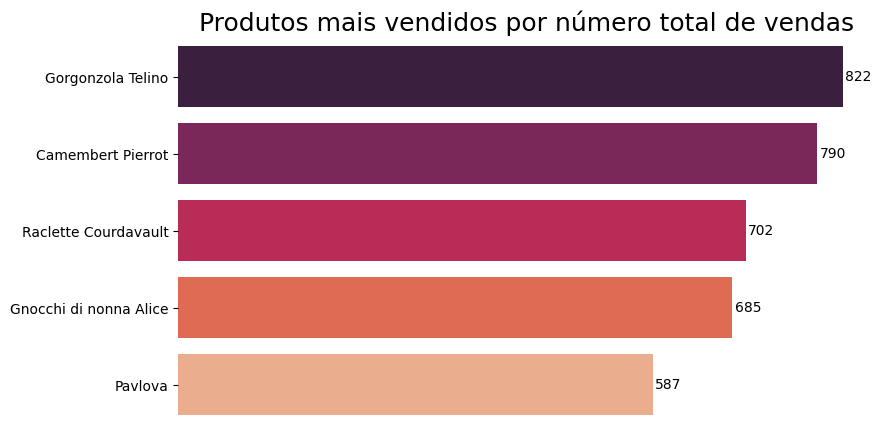

In [49]:
produtos_qtdvendas = new_df.groupby(['UnitPrice', 'ProductName'])['Quantity'].sum().reset_index()
produtos_qtdvendas  = produtos_qtdvendas.sort_values(by='Quantity', ascending=False)
produtos_qtdvendas  = produtos_qtdvendas.rename(columns={'Quantity': 'TotalSales'})

plt.figure(figsize=(9, 5))
paleta = sns.color_palette('rocket_r', 5)
ax = sns.barplot(x='TotalSales', y='ProductName', data=produtos_qtdvendas[:5], hue='TotalSales', palette=paleta, saturation=0.8, legend=False)
plt.title('Produtos mais vendidos por número total de vendas', fontsize=18)
plt.ylabel('', fontsize=14)
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for container in ax.containers:
    ax.bar_label(container, padding=2)
plt.show()


Os 10 produtos menos vendidos:

In [50]:
display(produtos_qtdvendas[['ProductName', 'TotalSales']].sort_values(by='TotalSales', ascending=True).head(10).set_index('TotalSales'))

,ProductName
TotalSales,
36,Mishi Kobe Niku
42,Laughing Lumberjack Lager
57,Gravad lax
72,Genen Shouyu
72,Queso Manchego La Pastora
95,Valkoinen suklaa
106,Chocolade
106,Grandma's Boysenberry Spread
129,Chef Anton's Gumbo Mix


Faturamento da empresa:

é a soma da: (Quantidade de venda * Valor da unidade) - Descontos

In [51]:
new_df['Income'] = (new_df['Quantity'] * new_df['UnitPrice']) - new_df['Discount']
faturamento_total = sum(new_df['Income'])
print("O faturamento total da empresa northwind é de: U$ {:,.2f}".format(faturamento_total))

O faturamento total da empresa northwind é de: U$ 684,789.23


Análise dos top vendedores 

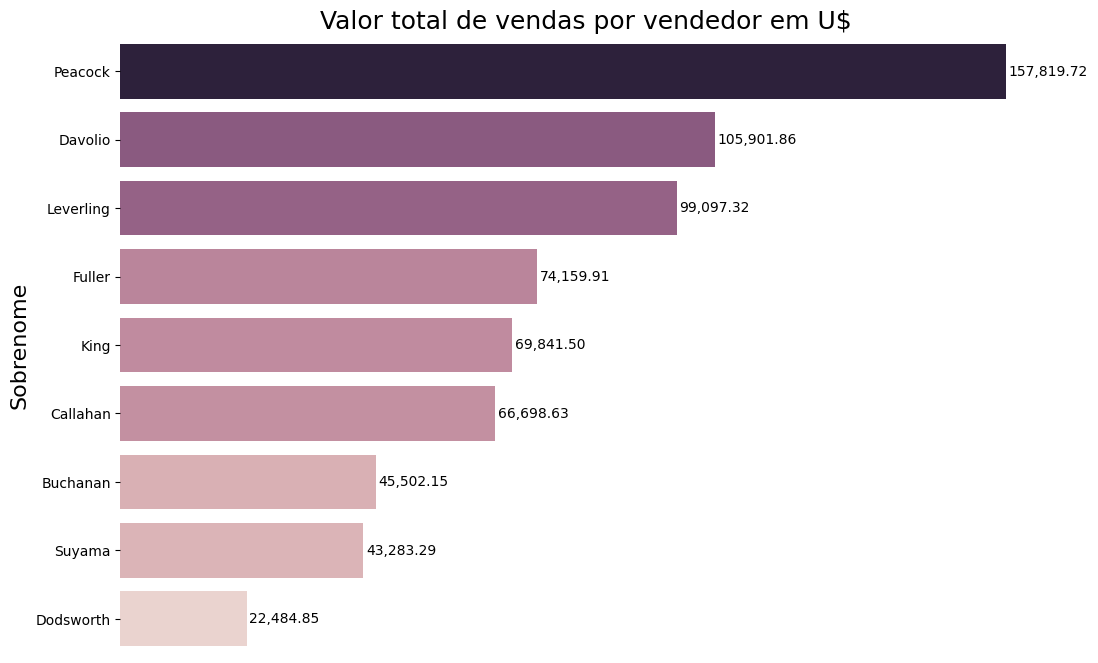

In [52]:
top_vendedores = new_df.groupby('LastName')['Income'].sum()
top_vendedores = top_vendedores.sort_values(ascending=False)
top_vendedores = top_vendedores.reset_index()
top_vendedores = top_vendedores.rename(columns={'Income': 'TotalSales'})

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='TotalSales', y='LastName', data=top_vendedores[:11], hue='TotalSales', saturation=0.8, legend=False)
plt.title('Valor total de vendas por vendedor em U$', fontsize=18)
plt.ylabel('Sobrenome', fontsize=16)
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for container in ax.containers:
        ax.bar_label(container, fmt='{:,.2f}', padding=2)
plt.show()

Análise de vendas por cargo

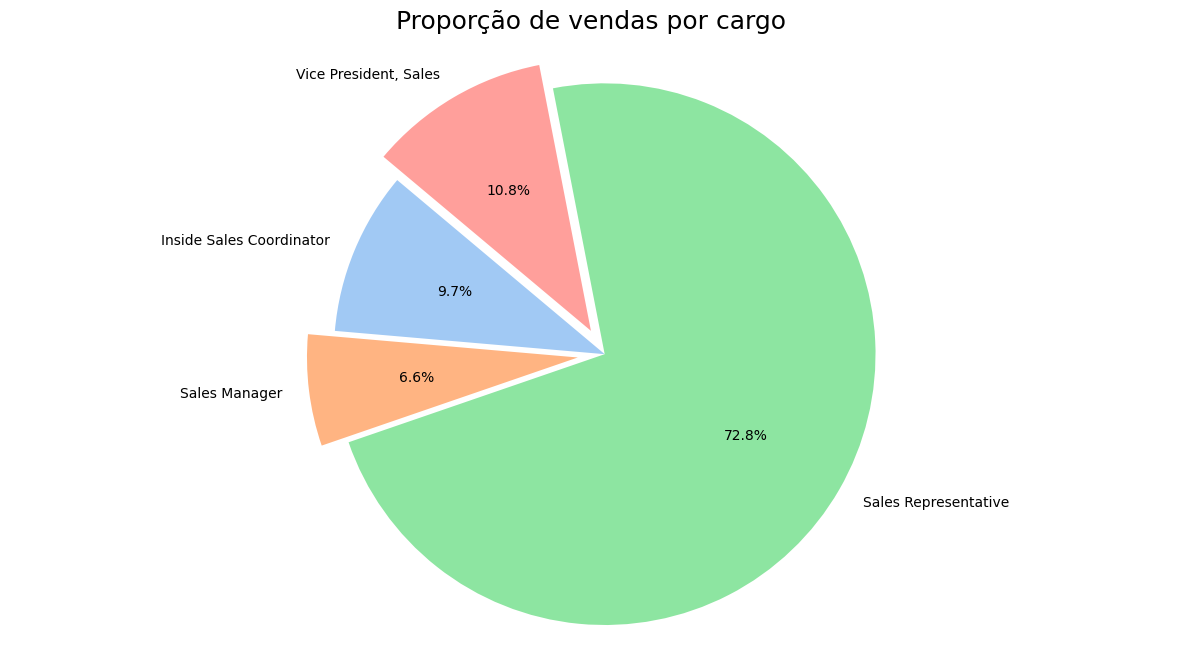

In [53]:
vendas_por_cargo = new_df.groupby('Title')['Income'].sum()
vendas_por_cargo = vendas_por_cargo.reset_index()
vendas_por_cargo = vendas_por_cargo.rename(columns={'Income': 'TotalSales'})

plt.figure(figsize=(15, 8))
paleta = sns.color_palette('pastel')[0:len(vendas_por_cargo)]
explode = (0, 0.1, 0.0, 0.1)  
plt.pie(vendas_por_cargo['TotalSales'], labels=vendas_por_cargo['Title'], colors=paleta, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de vendas por cargo', fontsize=18)
plt.axis('equal')  
plt.show()

Categorias de produtos mais vendidas

In [54]:
print(new_df['CategoryName'].value_counts())

CategoryName
Dairy Products    185
Beverages         181
Confections       158
Seafood           134
Condiments        100
Grains/Cereals     90
Meat/Poultry       87
Produce            65
Name: count, dtype: int64


,CategoryName,Description,TotalSales
3,Dairy Products,Cheeses,4622
0,Beverages,"Soft drinks, coffees, teas, beers, and ales",4171
2,Confections,"Desserts, candies, and sweet breads",3792
7,Seafood,Seaweed and fish,2914
1,Condiments,"Sweet and savory sauces, relishes, spreads, an...",2810
5,Meat/Poultry,Prepared meats,2195
4,Grains/Cereals,"Breads, crackers, pasta, and cereal",2175
6,Produce,Dried fruit and bean curd,1393


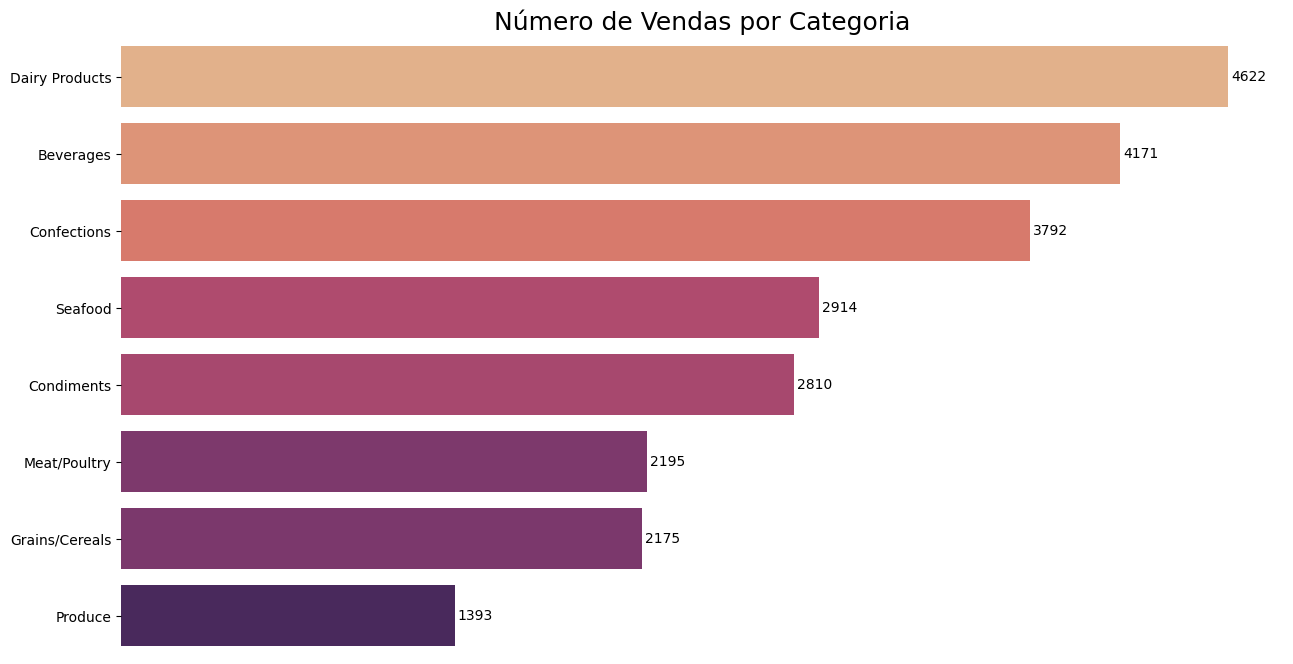

In [55]:
categ_maisvendidas = new_df.groupby(['CategoryName', 'Description'])['Quantity'].sum().reset_index()
categ_maisvendidas  = categ_maisvendidas.sort_values(by='Quantity', ascending=False)
categ_maisvendidas  = categ_maisvendidas.rename(columns={'Quantity': 'TotalSales'})
display(categ_maisvendidas)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='TotalSales', y='CategoryName', data=categ_maisvendidas, hue='TotalSales', palette='flare_r', saturation=0.8, legend=False)
plt.title('Número de Vendas por Categoria', fontsize=18)
plt.ylabel('', fontsize=14)
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for container in ax.containers:
    ax.bar_label(container, padding=2)
plt.show()

Descobrindo os países que mais compram os produtos da empresa

In [56]:
vendas_por_pais = new_df.groupby('ShipCountry')['Quantity'].sum().reset_index()
vendas_por_pais  = vendas_por_pais.sort_values(by='Quantity',ascending=False)
vendas_por_pais  = vendas_por_pais.rename(columns={'Quantity': 'TotalSales'})

display(vendas_por_pais[:8].set_index('TotalSales'))

,ShipCountry
TotalSales,
4563,Germany
3867,USA
2287,Austria
1748,Brazil
1725,France
1420,Canada
1396,UK
1321,Venezuela


Preferência de categorias de produtos por país

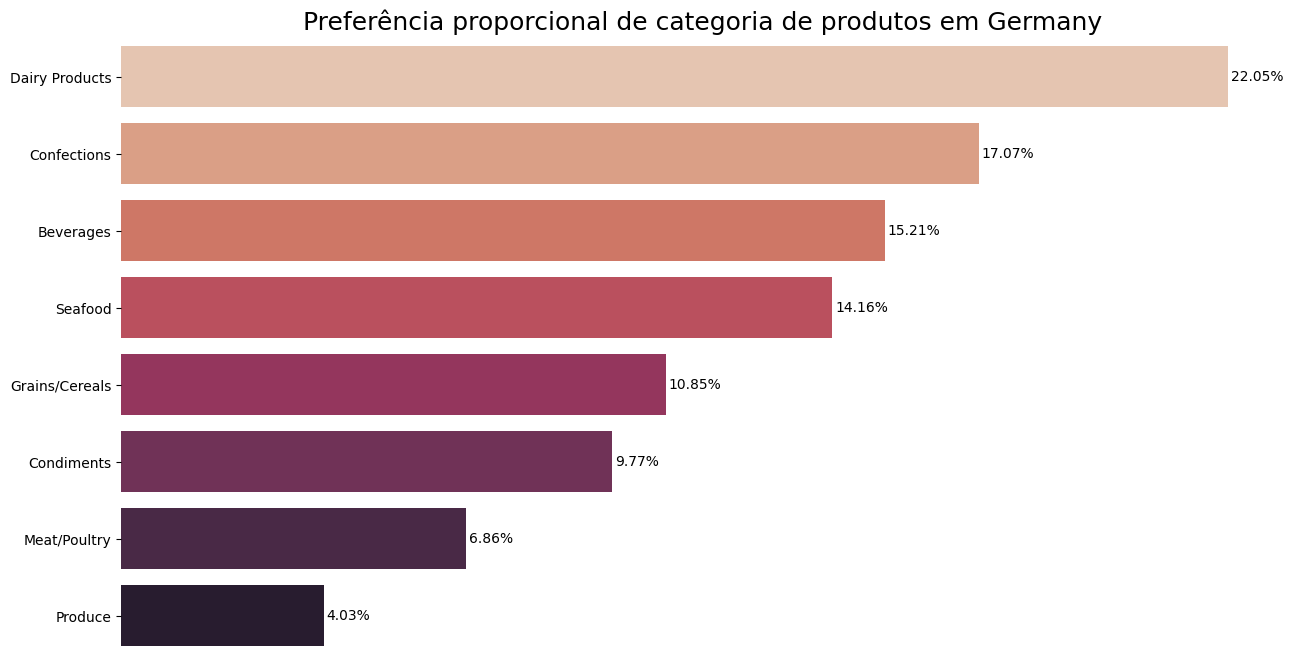

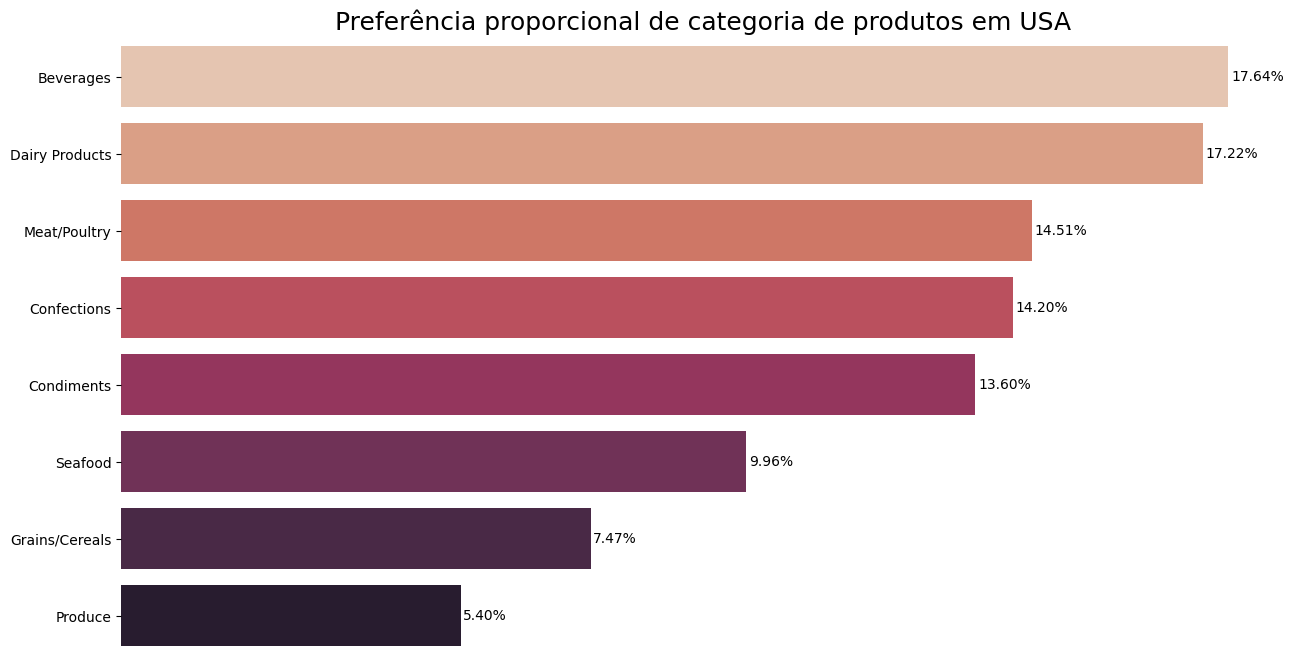

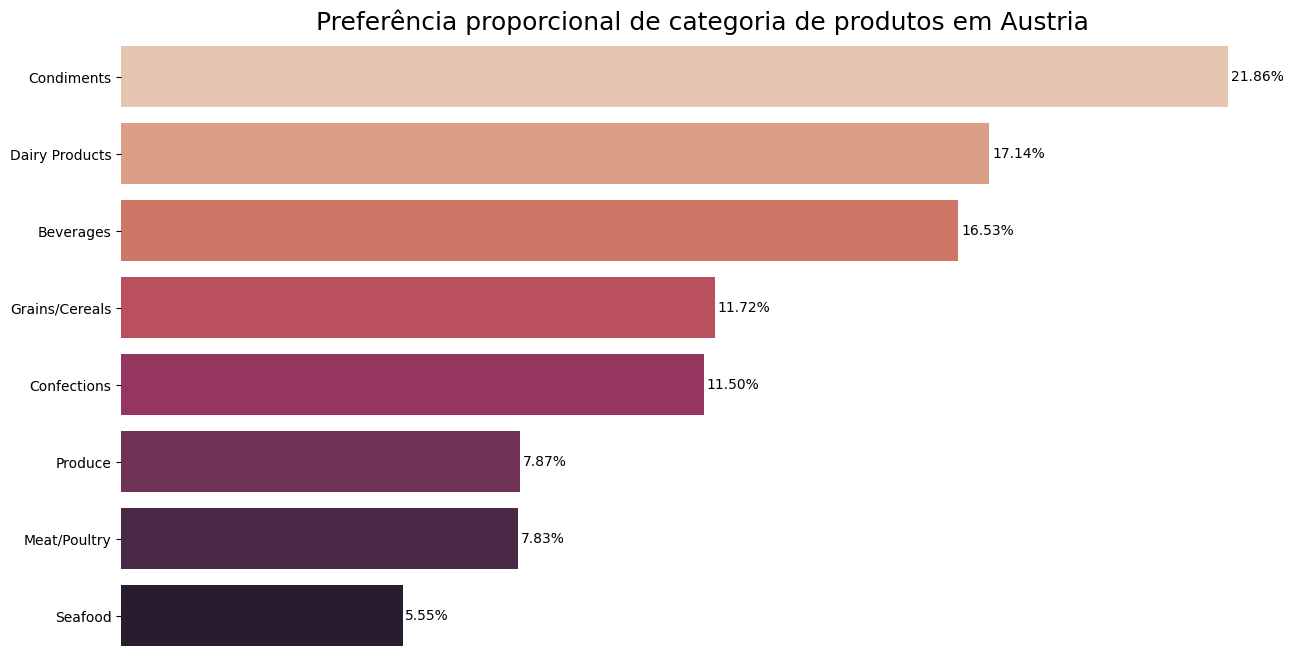

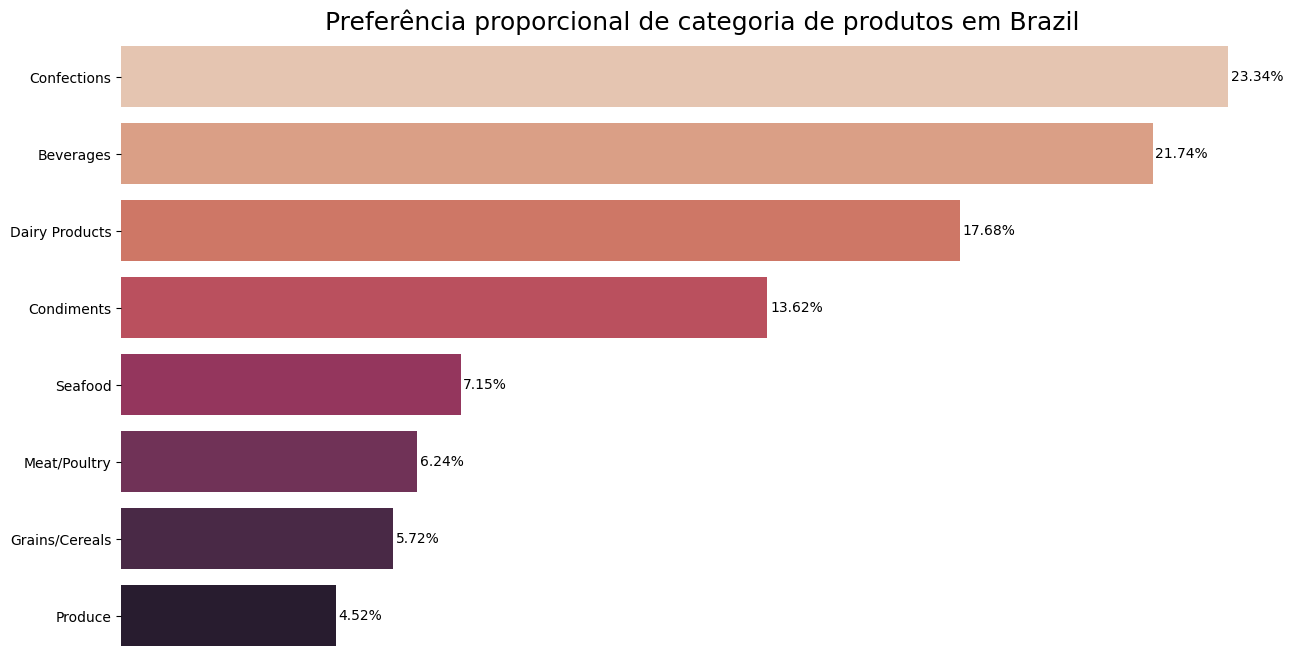

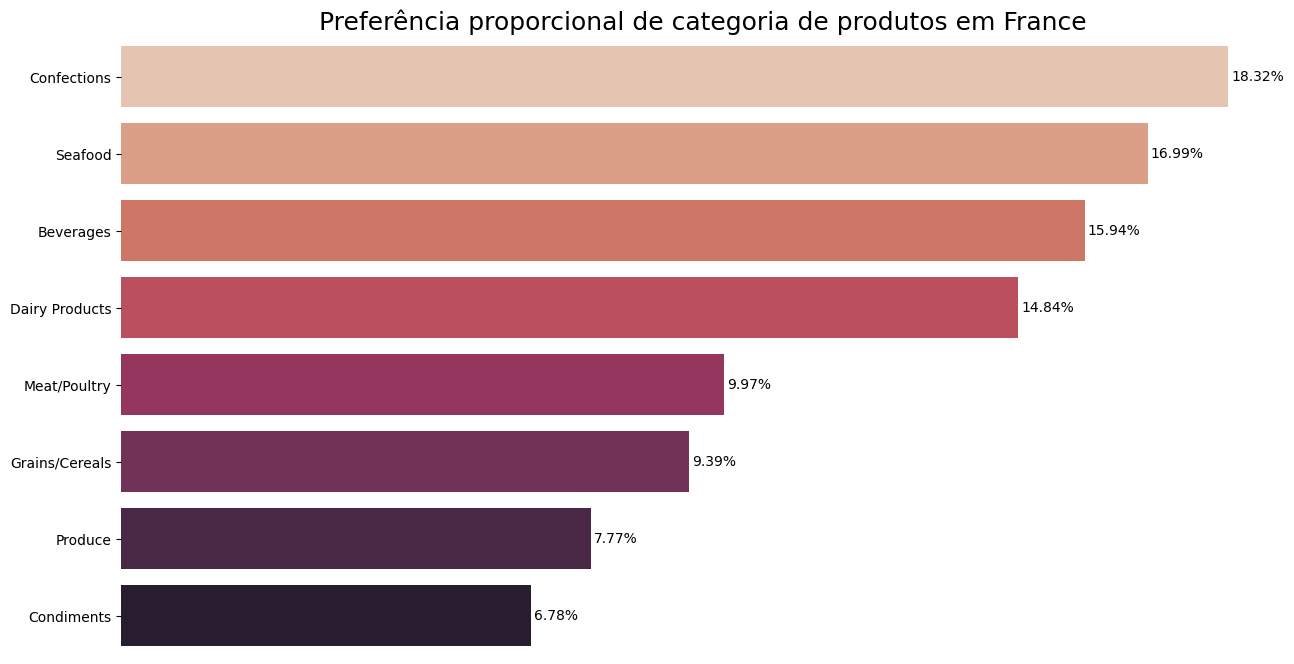

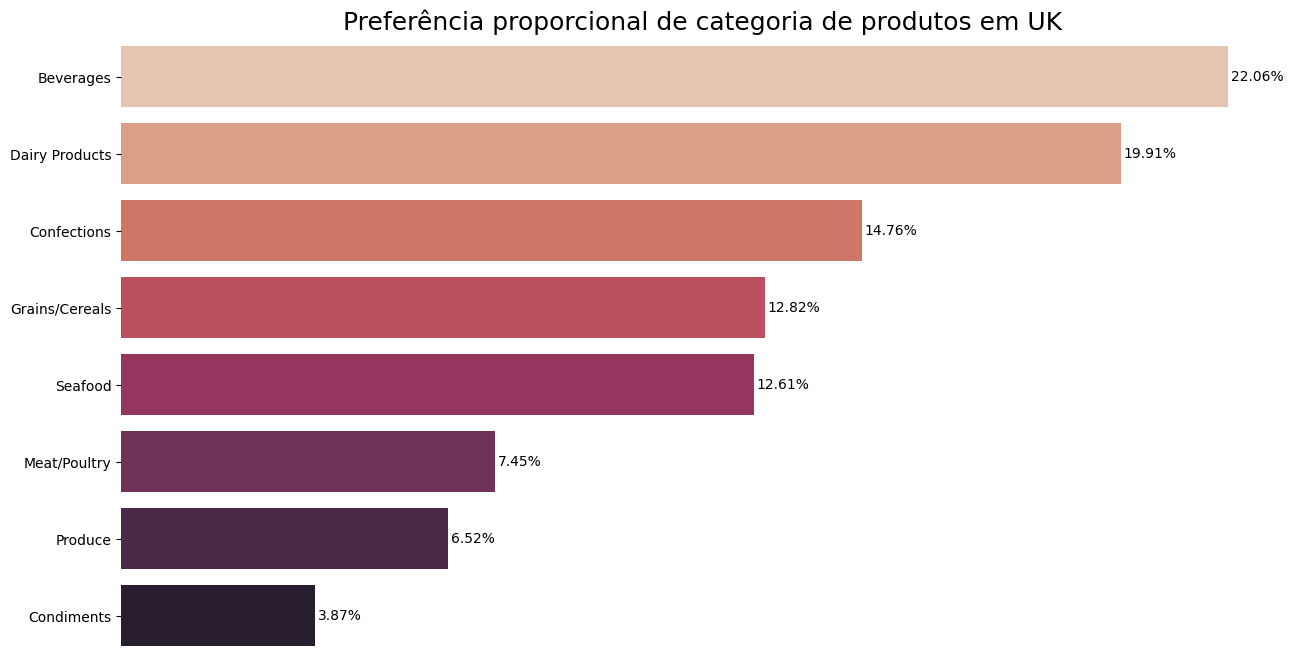

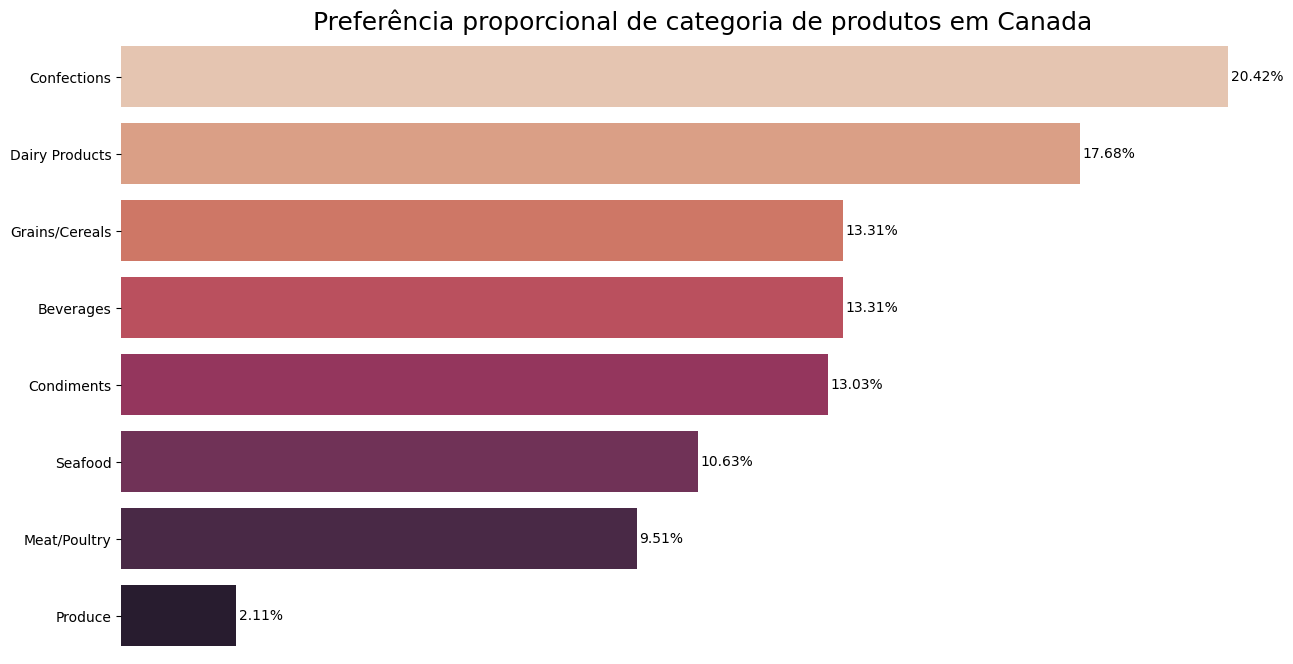

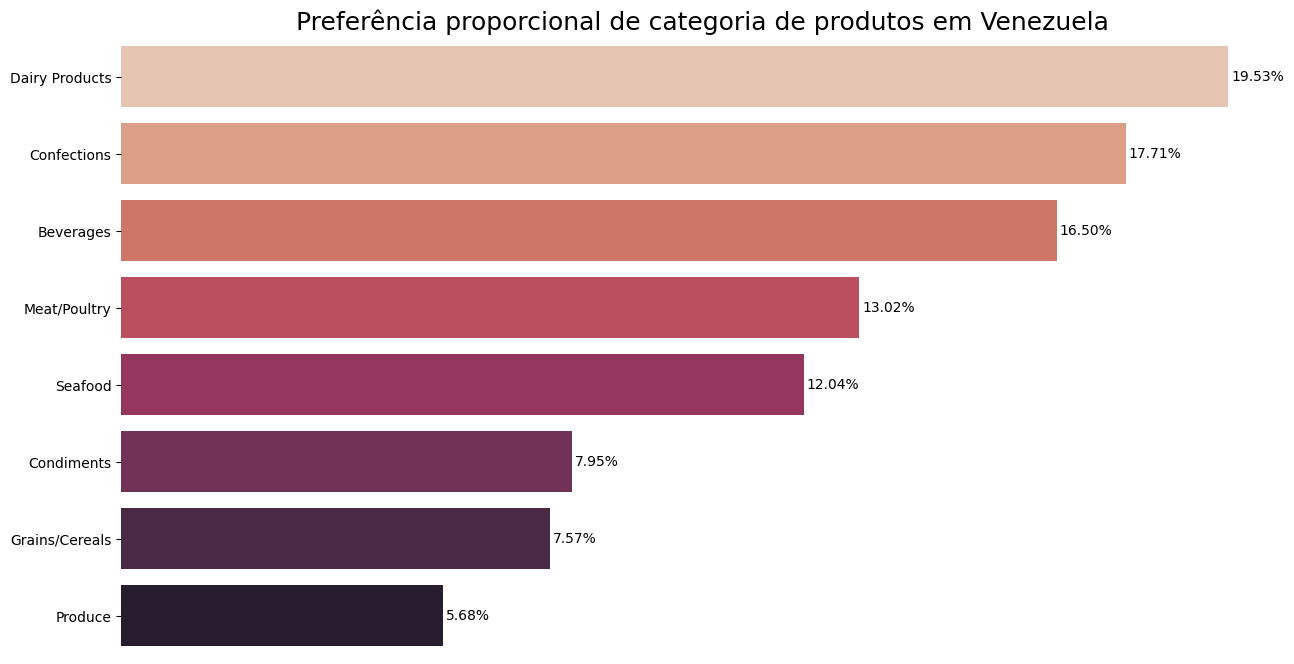

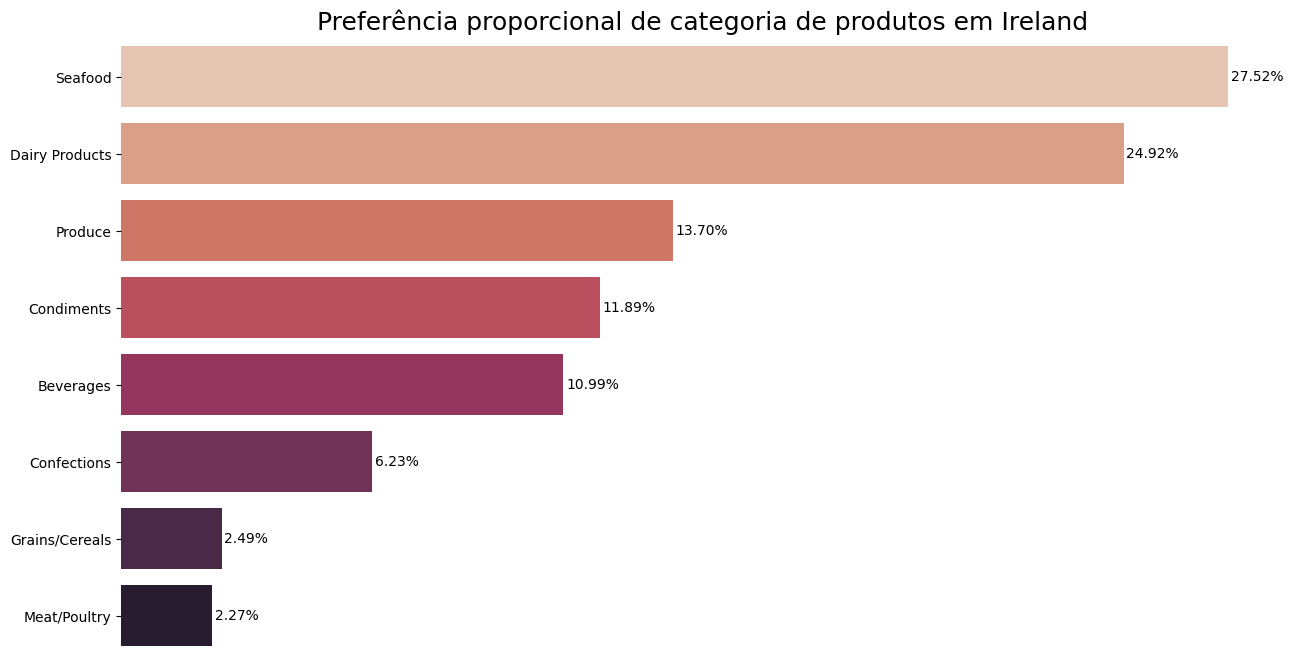

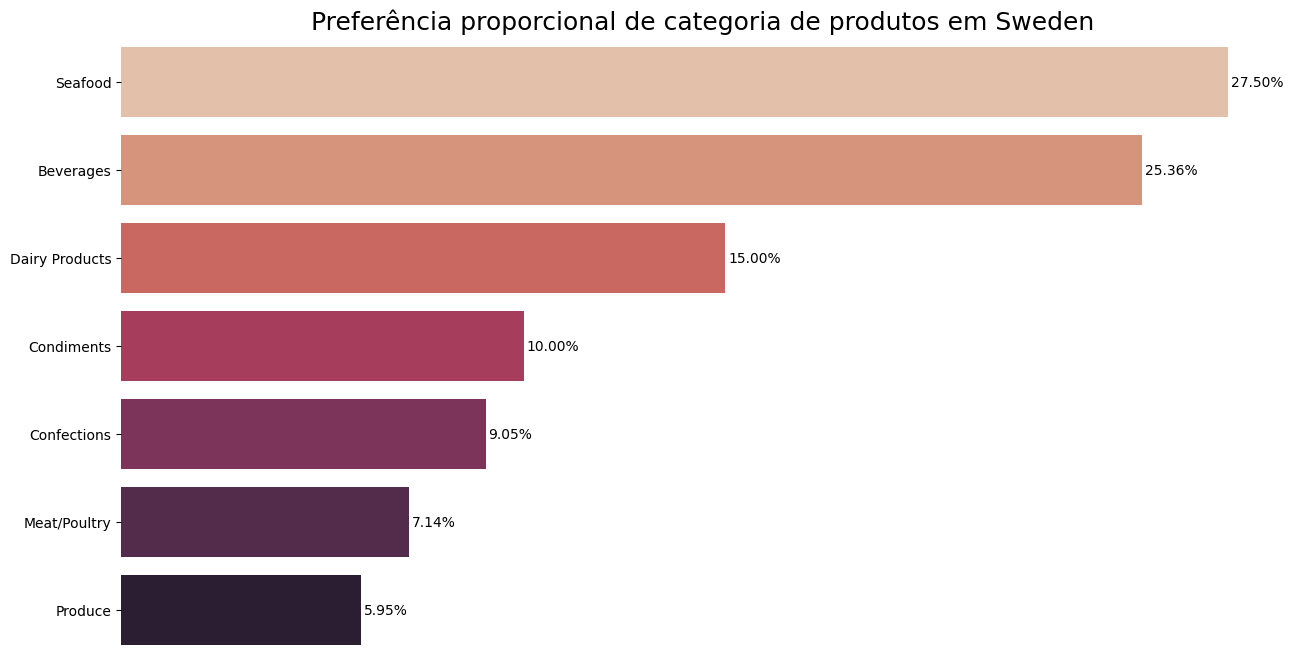

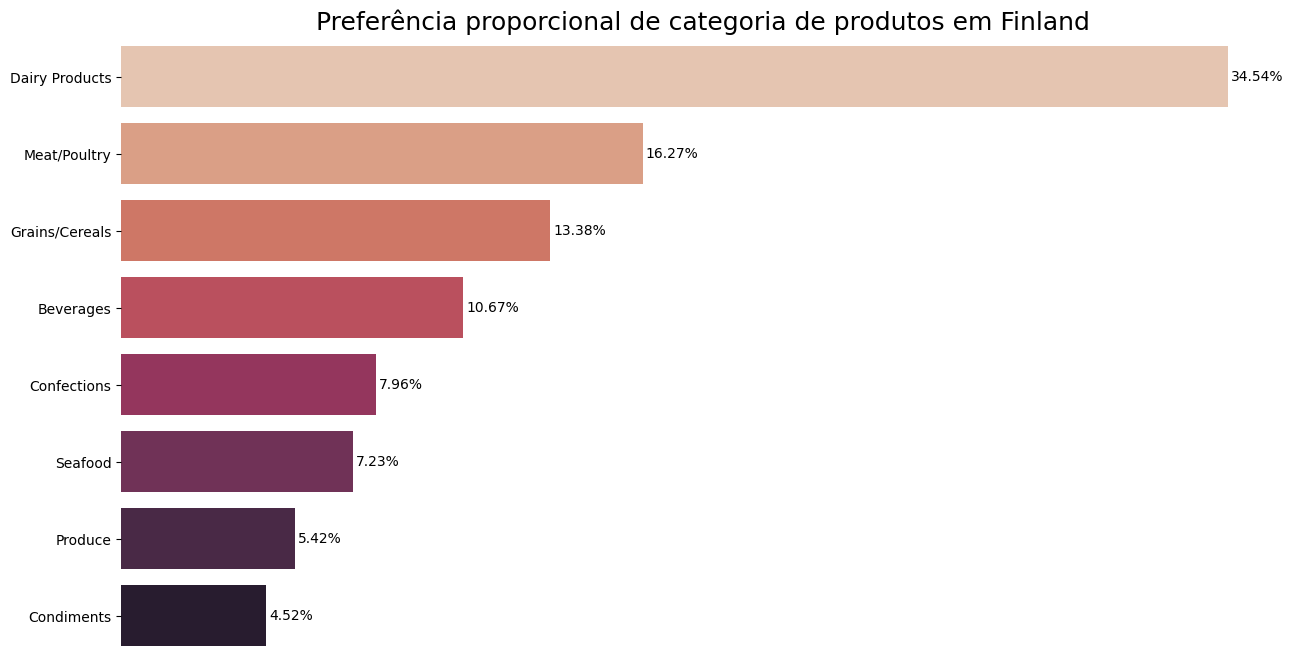

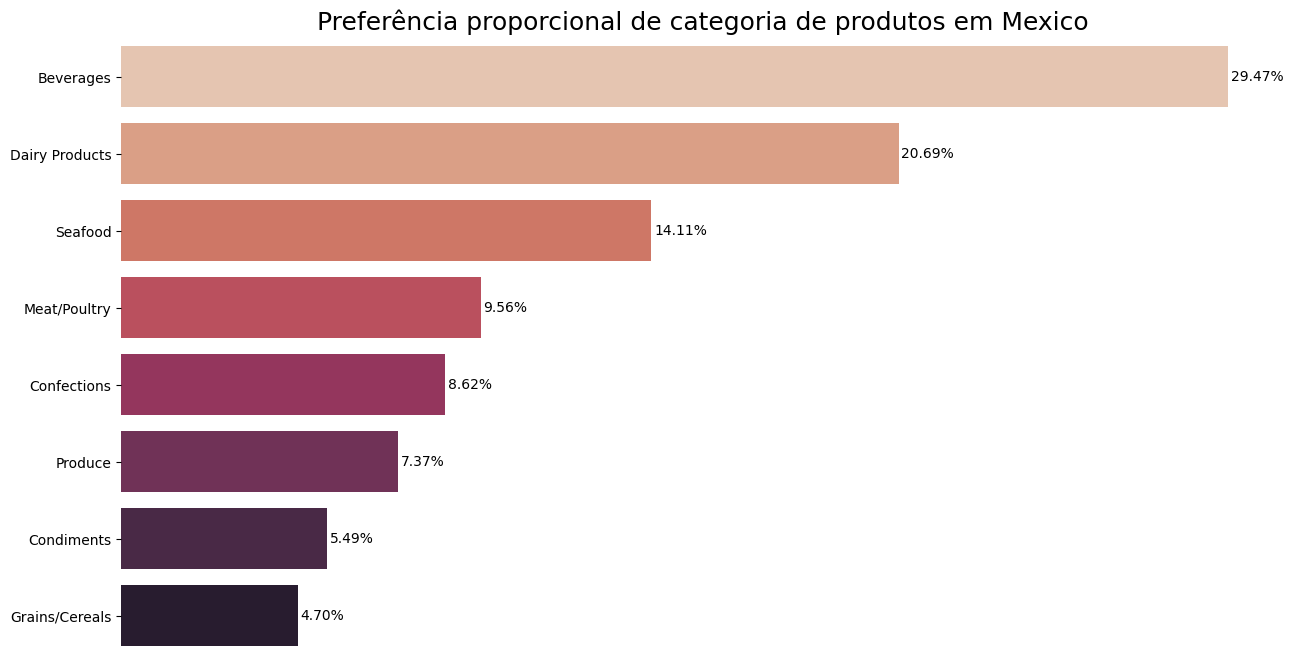

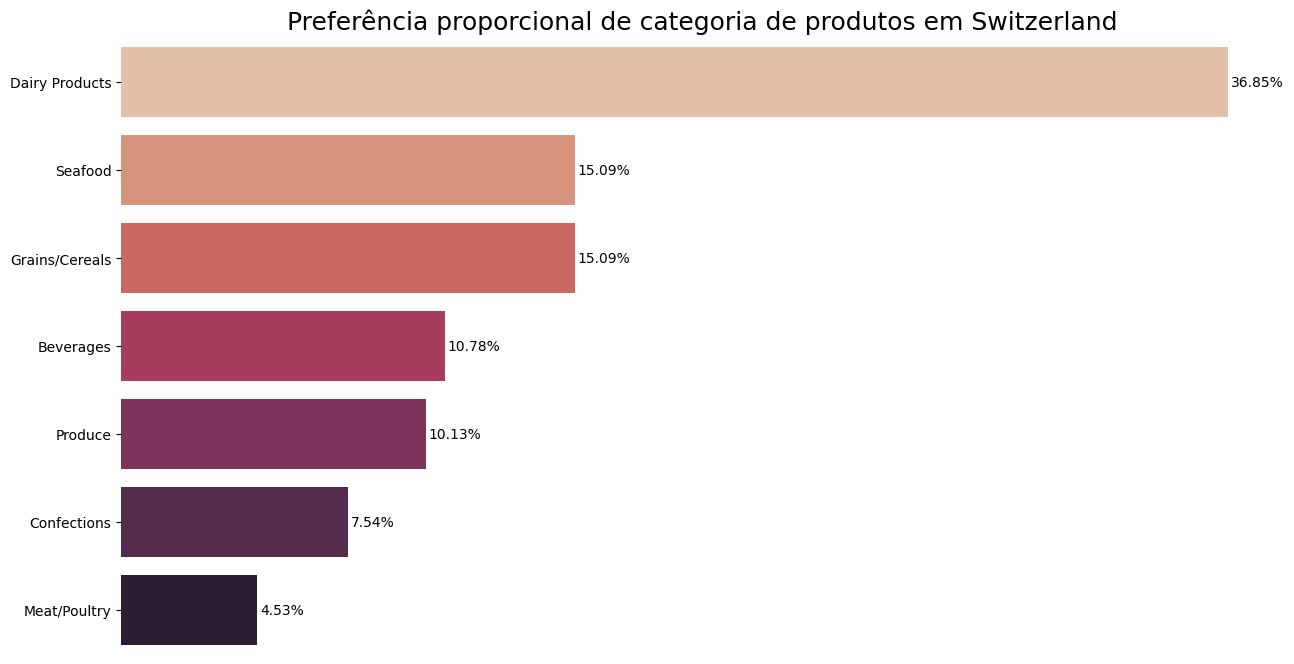

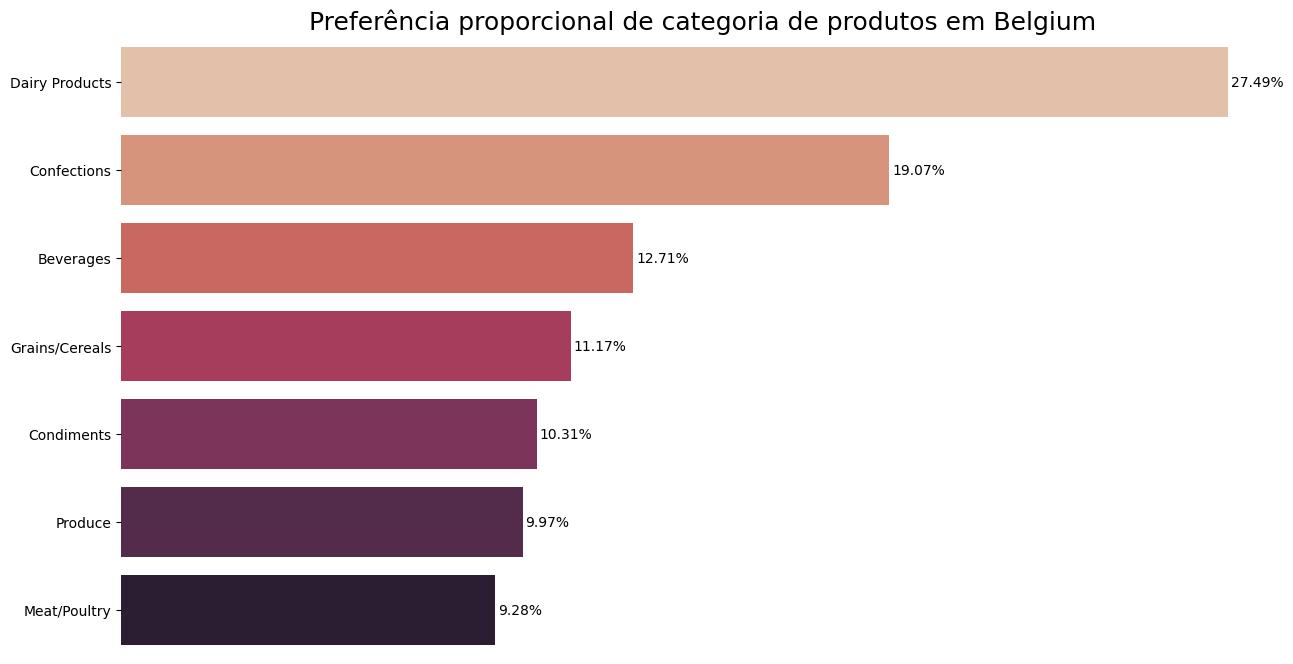

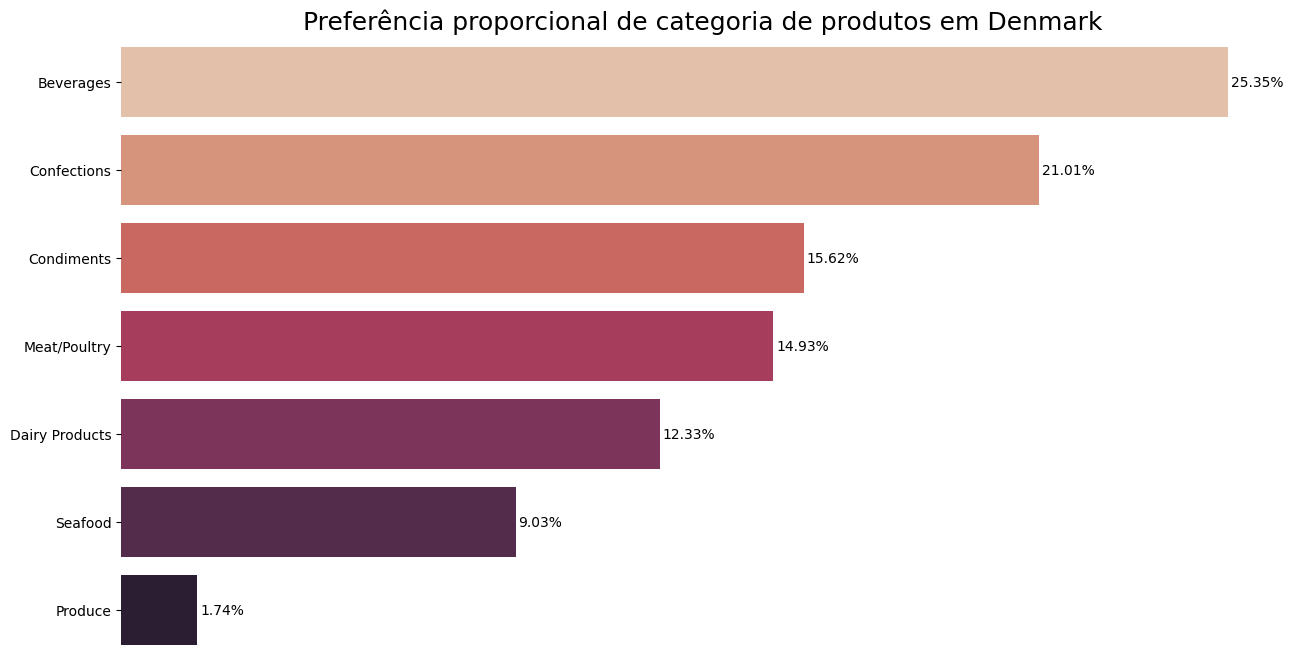

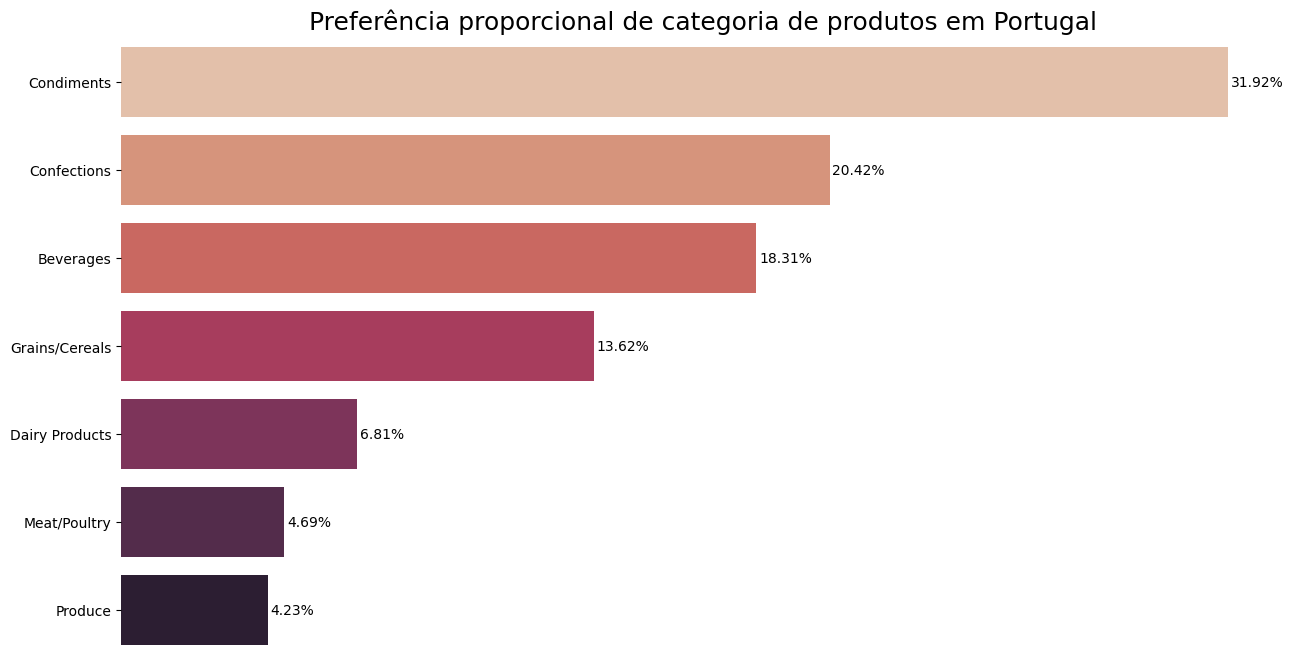

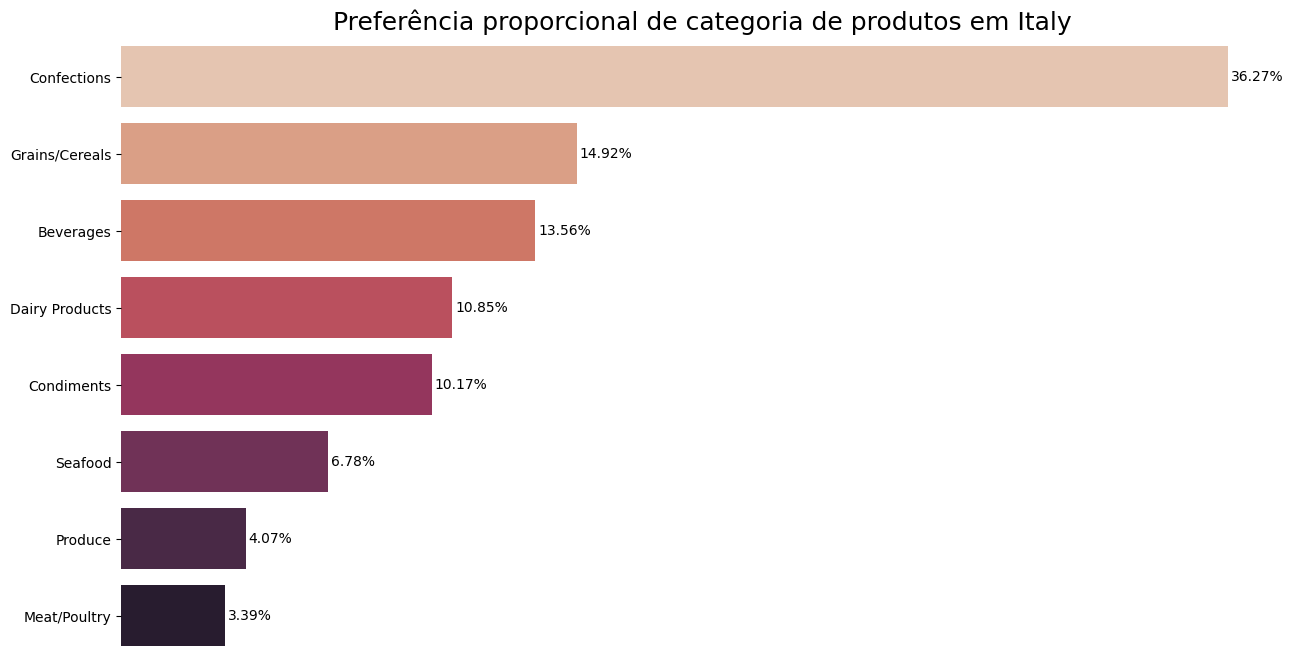

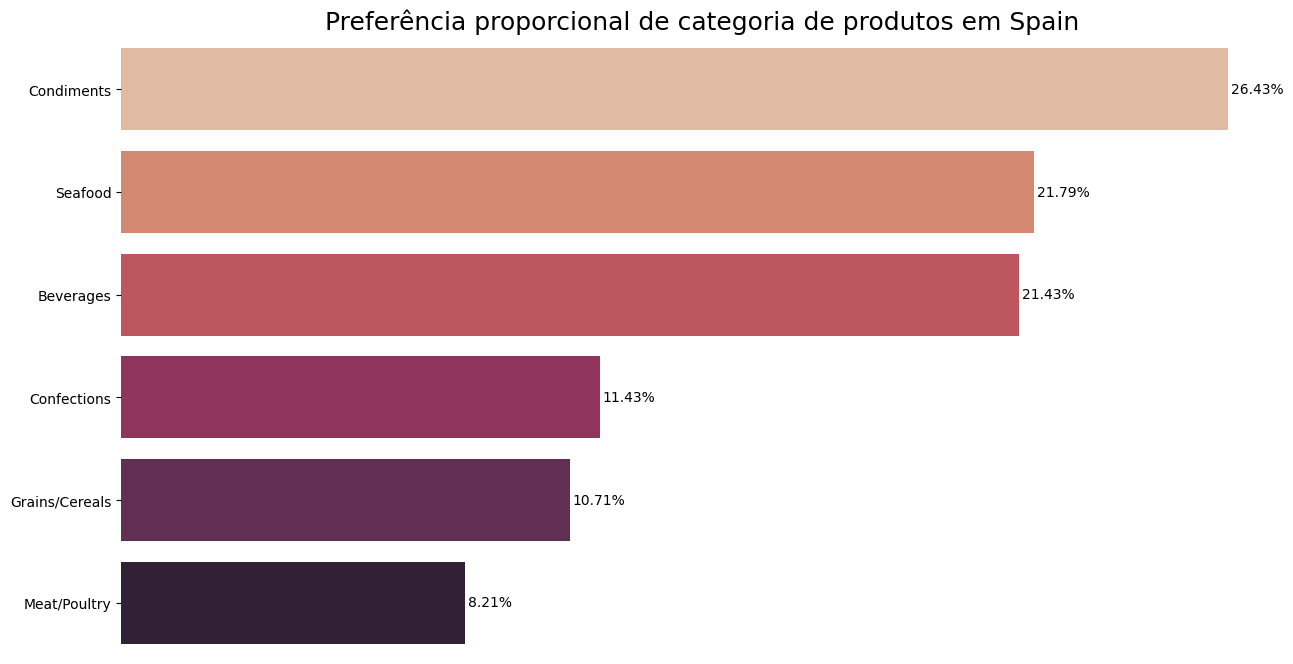

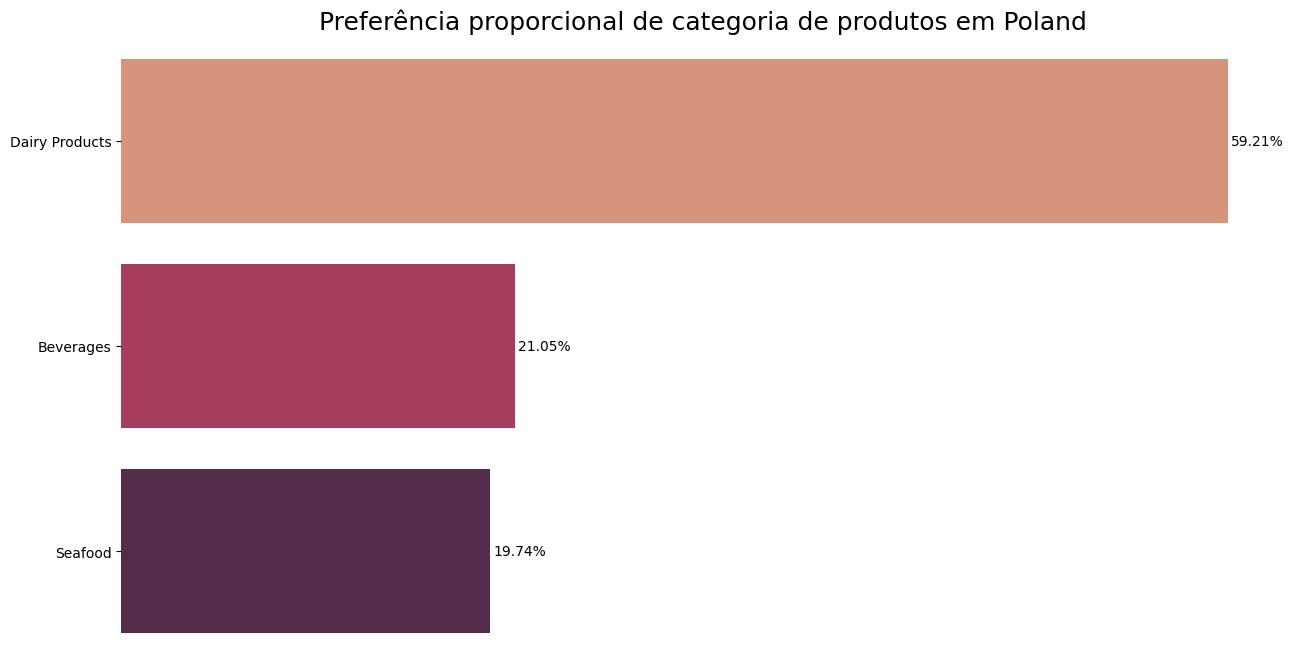

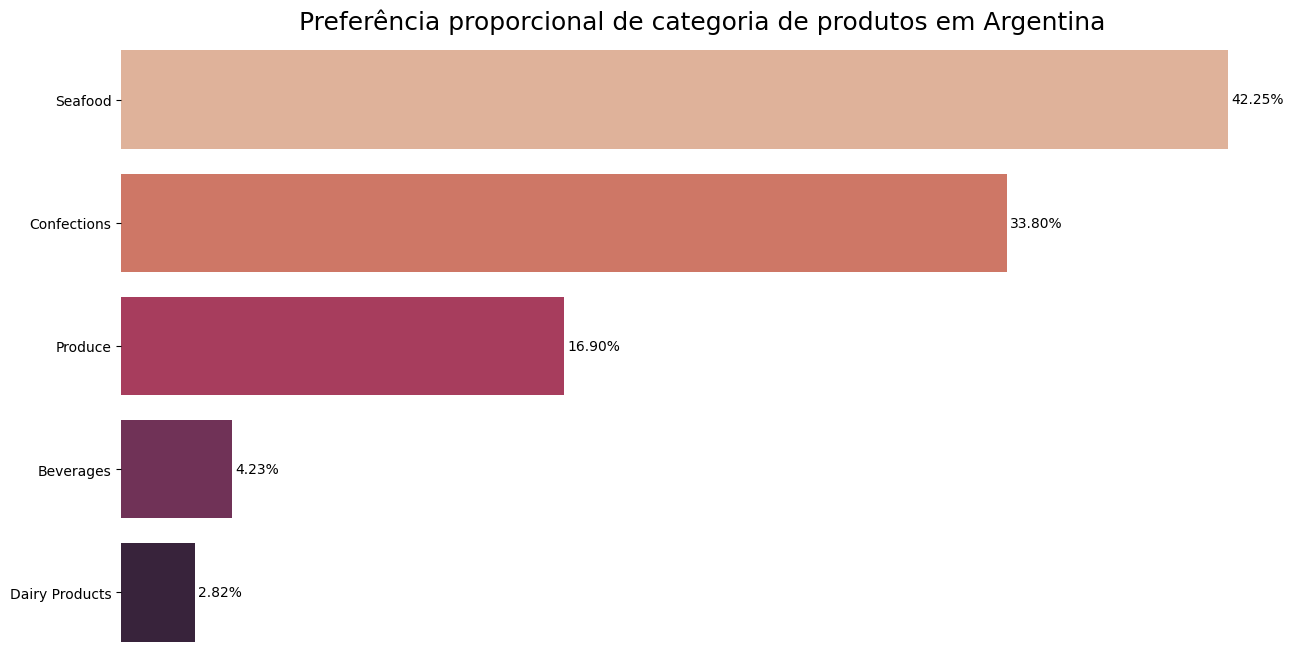

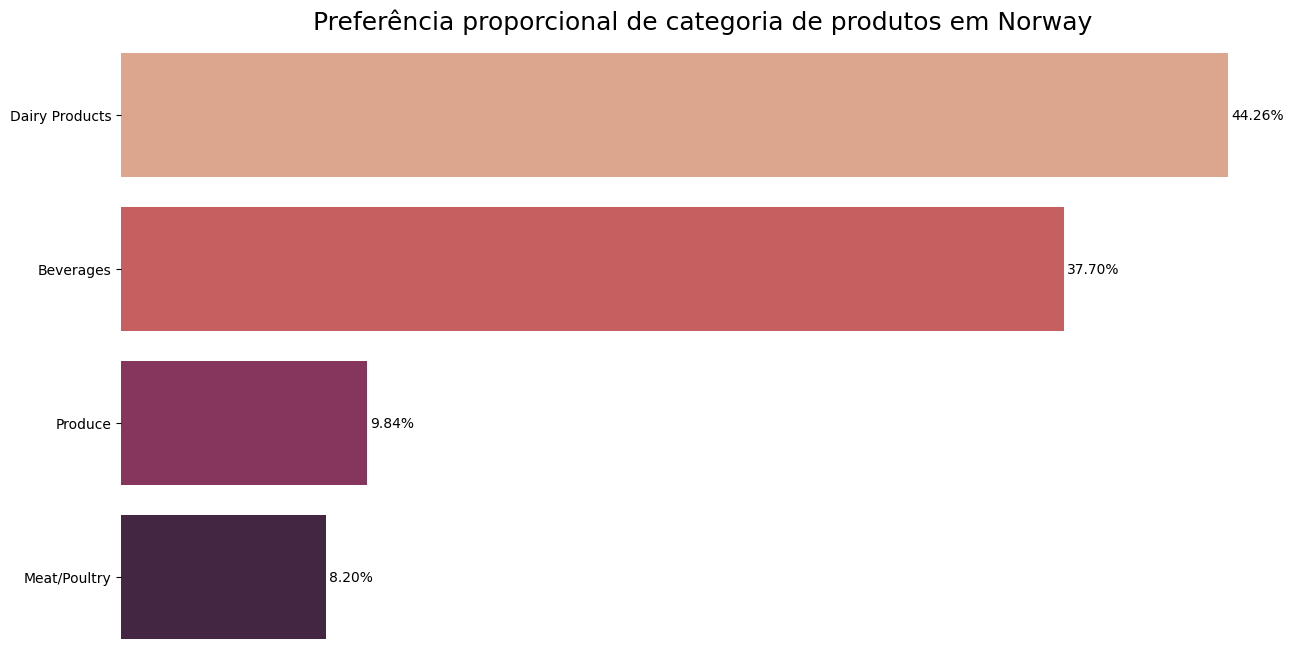

In [57]:
# Calculando a proporção de vendas por categoria em cada país
categ_por_pais = new_df.groupby(['ShipCountry', 'CategoryName'])['Quantity'].sum().reset_index()
categ_por_pais = categ_por_pais.sort_values(by='Quantity', ascending=False)
categ_por_pais = categ_por_pais.rename(columns={'Quantity': 'NumberSales'})

# Unindo as tabelas para calcular a proporção
categ_por_pais = pd.merge(categ_por_pais, vendas_por_pais, on='ShipCountry')
categ_por_pais['Proportion'] = (categ_por_pais['NumberSales'] / categ_por_pais['TotalSales']) * 100

# Plotando um gráfico para cada país
paises = categ_por_pais['ShipCountry'].unique()
for pais in paises:
    dados_pais = categ_por_pais[categ_por_pais['ShipCountry'] == pais]
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(y='CategoryName', x='Proportion', data=dados_pais, hue='CategoryName', palette='rocket_r', saturation=0.6)
    plt.title(f'Preferência proporcional de categoria de produtos em {pais}', fontsize=18)
    plt.ylabel('', fontsize=16)
    ax.get_xaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', padding=2)
    plt.show()


### Análise de churn: 
para o tanto vamos considerar que churn são aqueles clientes que não fizeram negócio nos últimos 6 meses, que é um tempo razoável.

In [24]:
# Definindo clientes que não compraram nos últimos 6 meses em uma variável 
ultimo_mes = new_df['OrderDate'].max()
seis_meses_atras = ultimo_mes - pd.DateOffset(months=6)

# Criando variável para clientes ativos
clientes_ativos = new_df[new_df['OrderDate'] >= seis_meses_atras]['CustomerID'].unique()
clientes_totais = new_df['CustomerID'].unique()

clientes_churn = set(clientes_totais) - set(clientes_ativos)

n_clientes_churn = len(clientes_churn)
taxa_churn = n_clientes_churn / len(clientes_totais)

print(f"""
    Número de clientes totais: {len(clientes_totais)}
    Número de clientes que deixaram de fazer negócios: {n_clientes_churn}
    Taxa aproximada de churn: {taxa_churn:.2%}
""")


    Número de clientes totais: 85
    Número de clientes que deixaram de fazer negócios: 10
    Taxa aproximada de churn: 11.76%



In [25]:
# Criando um looping para descobrir o balanço médio de valores em compras que os clientes que churnaram
# faremos através da criaremos a partir de uma nova coluna booleana 

new_df['is_active_client'] = new_df['CustomerID'].apply(lambda x: 1 if x in clientes_ativos else 0)

In [26]:
# Descobrindo a média de faturamento que os clientes churned levaram. Analisaremos a partir da coluna criada acima 

avg_churned_faturamento = new_df[new_df['is_active_client']==0]['Income'].mean()
print(f'Média de faturamento que os clientes churned levaram: U$ {avg_churned_faturamento:,.2f}')

Média de faturamento que os clientes churned levaram: U$ 432.26


In [27]:
clientes_inativos = new_df[new_df['is_active_client'] == 0]
clientes_inativos[['ProductName']].value_counts()

ProductName                    
Mozzarella di Giovanni             3
Tourtière                          3
Gnocchi di nonna Alice             3
Nord-Ost Matjeshering              3
Ravioli Angelo                     2
Thüringer Rostbratwurst            2
Teatime Chocolate Biscuits         2
Gorgonzola Telino                  2
Rhönbräu Klosterbier               2
Gumbär Gummibärchen                2
Scottish Longbreads                1
Camembert Pierrot                  1
Singaporean Hokkien Fried Mee      1
Sir Rodney's Scones                1
Raclette Courdavault               1
Tarte au sucre                     1
Steeleye Stout                     1
Pavlova                            1
Queso Cabrales                     1
Perth Pasties                      1
Chef Anton's Cajun Seasoning       1
Lakkalikööri                       1
Konbu                              1
Guaraná Fantástica                 1
Gravad lax                         1
Geitost                            1
Flotem

Análise do perfil dos clientes que churnaram

In [28]:
# Descobriremos a partir das 5 últimas transações realizadas pelos clientes antes do churn
# essa informação pode ser utilizada para identificar possíveis vícios de produtos ou padrões

for client in clientes_inativos['CustomerID'].unique():
    
    # Filtrar dados de clientes
    dados_cliente = clientes_inativos[clientes_inativos['CustomerID'] == client]
    ultimas_transacoes = dados_cliente.sort_values(by='Quantity', ascending=False).head(5)
    
    # Selecionaremos as 5 últimas transações e ordenaremos pela quantidade vendida 
    ultimas_transacoes = ultimas_transacoes.set_index('Quantity')

    # Exibir as transações
    display(ultimas_transacoes[['ProductName', 'CustomerCountry']])
    

,ProductName,CustomerCountry
Quantity,,
50,Rhönbräu Klosterbier,Spain
24,Chef Anton's Cajun Seasoning,Spain
16,Ravioli Angelo,Spain


,ProductName,CustomerCountry
Quantity,,
40,Tourtière,USA
24,Geitost,USA
24,Tourtière,USA
20,Thüringer Rostbratwurst,USA
20,Côte de Blaye,USA


,ProductName,CustomerCountry
Quantity,,
20,Flotemysost,France
12,Queso Cabrales,France
10,Singaporean Hokkien Fried Mee,France
7,Mozzarella di Giovanni,France
5,Mozzarella di Giovanni,France


,ProductName,CustomerCountry
Quantity,,
20,Gorgonzola Telino,Germany
18,Konbu,Germany
12,Rhönbräu Klosterbier,Germany
12,Lakkalikööri,Germany


,ProductName,CustomerCountry
Quantity,,
10,Pavlova,USA
5,Tarte au sucre,USA


,ProductName,CustomerCountry
Quantity,,
10,Nord-Ost Matjeshering,Spain
10,Perth Pasties,Spain
6,Guaraná Fantástica,Spain
6,Nord-Ost Matjeshering,Spain
5,Tourtière,Spain


,ProductName,CustomerCountry
Quantity,,
10,Sir Rodney's Scones,Mexico
1,Gravad lax,Mexico


,ProductName,CustomerCountry
Quantity,,
2,Gumbär Gummibärchen,Italy


,ProductName,CustomerCountry
Quantity,,
10,Thüringer Rostbratwurst,Venezuela
4,Mozzarella di Giovanni,Venezuela


,ProductName,CustomerCountry
Quantity,,
20,Raclette Courdavault,Brazil
14,Gorgonzola Telino,Brazil


Conforme supra, alguns produtos se repetem em diferentes pedidos e destinos, informação que pode ser útil 
se analisada em conjunto com as vendas totais. 
Porém, a partir da análise realizada, é possível extrair diversos insights relacionados ao perfil regional dos clientes, assim como a preferência regional de produtos e categorias. 
Além disso fora feita a análise de performance de funcionários, cálculo de orçamento. 
